# Analisi tecnica

  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   --------------------- ------------------ 41.0/75.0 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 819.9 kB/s eta 0:00:00
[*********************100%%**********************]  1 of 1 completed


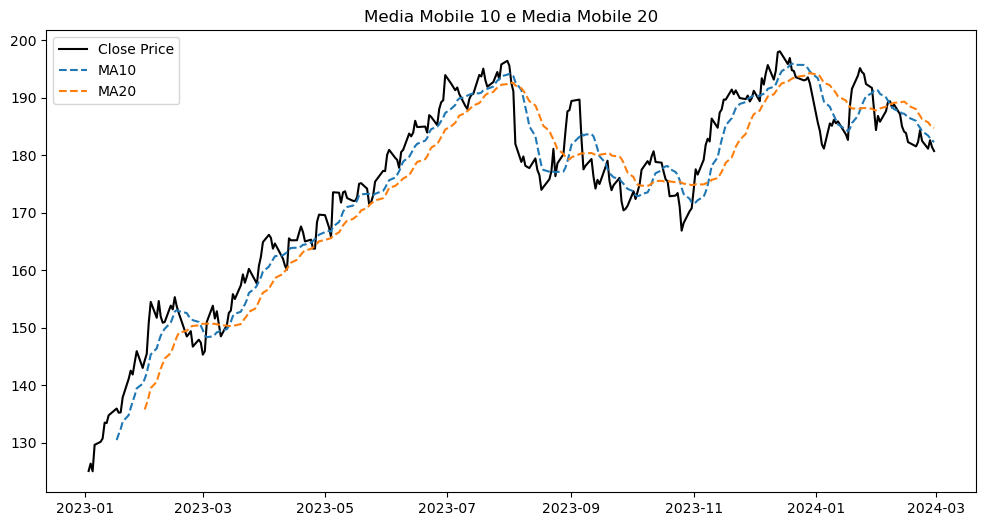

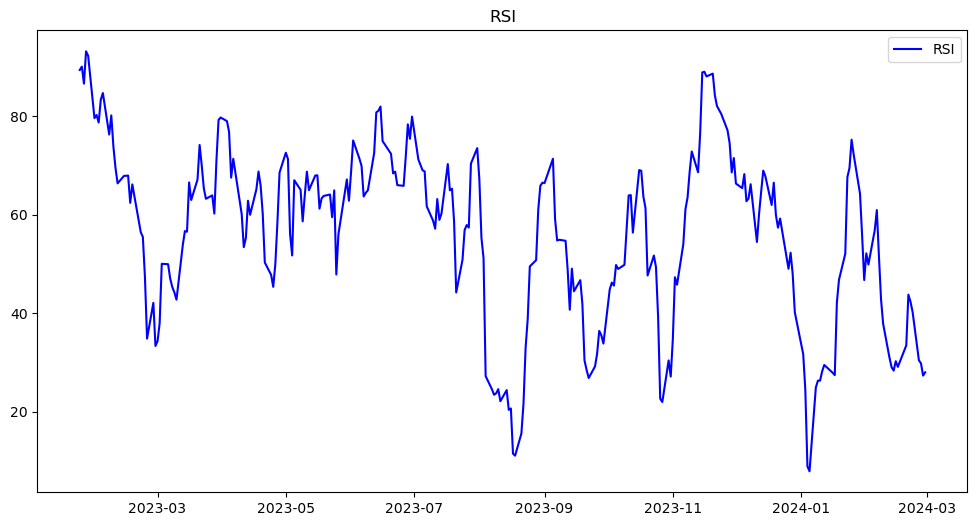

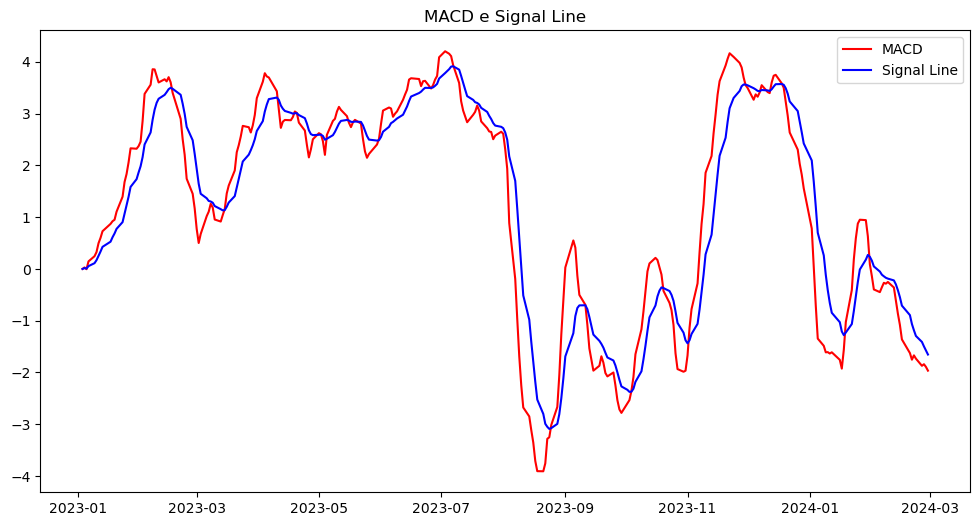

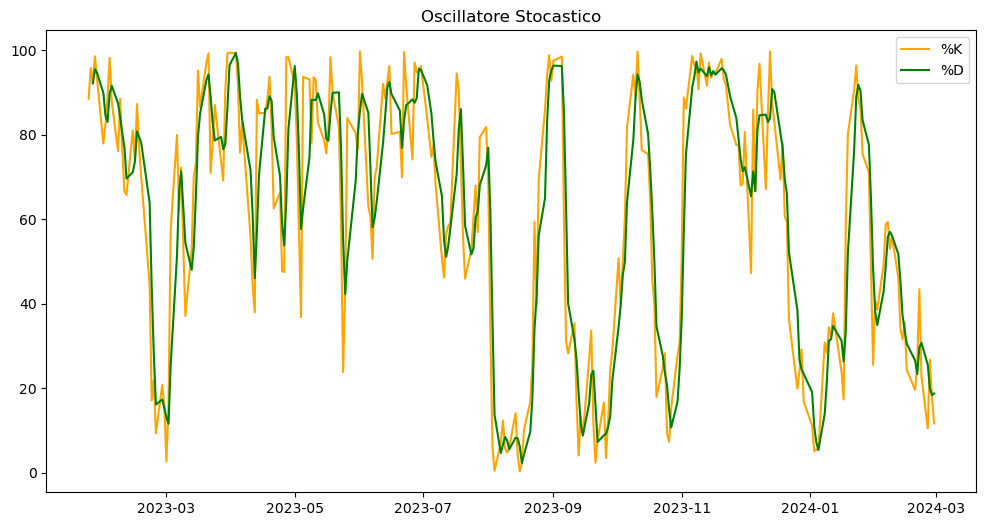

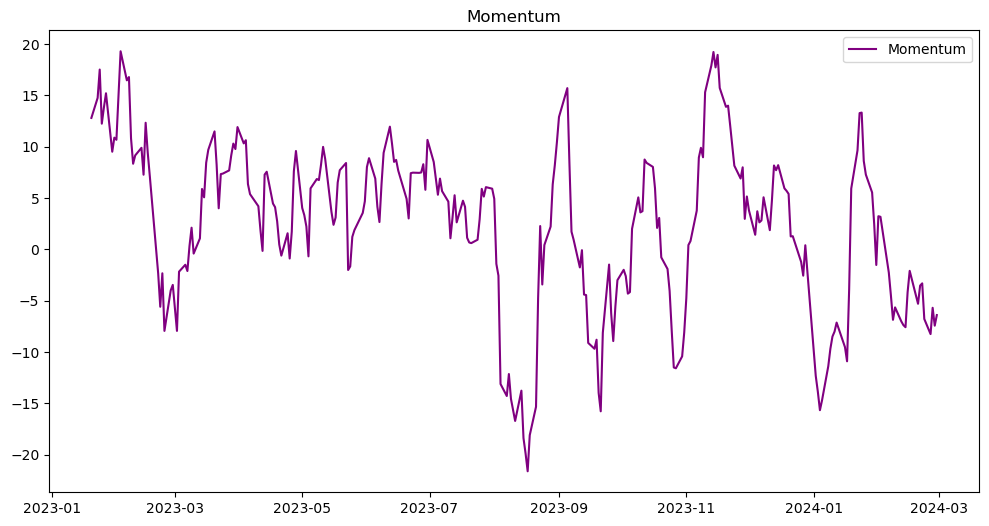

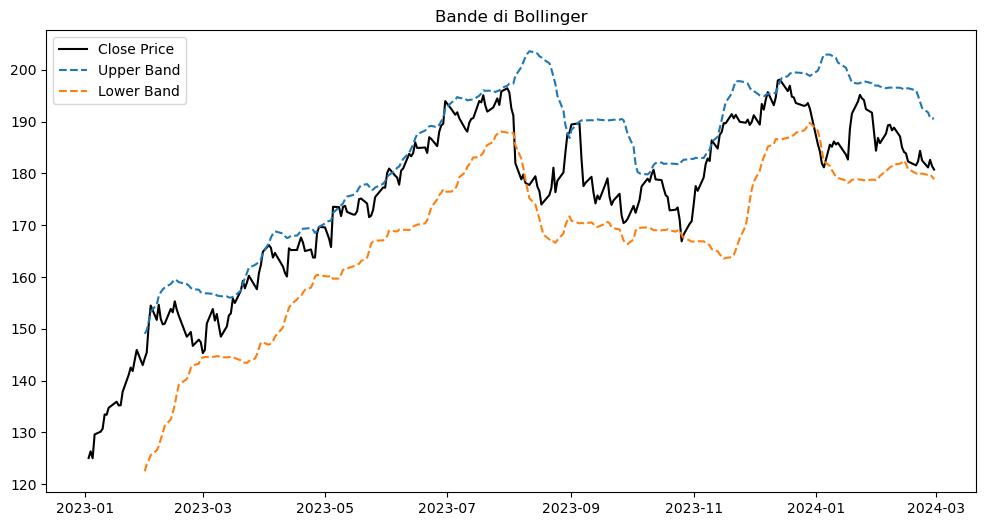

In [1]:
!pip install mplfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.signal import argrelextrema
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Funzione per calcolare la media mobile
def calcola_media_mobile(data, window):
    return data['Close'].rolling(window=window).mean()

# Funzione per calcolare l'RSI
def calcola_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Funzione per calcolare il MACD
def calcola_macd(data, window_short, window_long):
    short_ema = data['Close'].ewm(span=window_short, min_periods=1).mean()
    long_ema = data['Close'].ewm(span=window_long, min_periods=1).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, min_periods=1).mean()
    return macd, signal_line

# Funzione per calcolare le bande di Bollinger
def calcola_bollinger_bands(data, window):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)
    return upper_band, lower_band

# Funzione per calcolare l'oscillatore stocastico
def calcola_stochastic_oscillator(data, window):
    lowest_low = data['Low'].rolling(window=window).min()
    highest_high = data['High'].rolling(window=window).max()
    k_percent = ((data['Close'] - lowest_low) / (highest_high - lowest_low)) * 100
    d_percent = k_percent.rolling(window=3).mean()  # Moving average of k_percent
    return k_percent, d_percent

# Funzione per calcolare il momentum
def calcola_momentum(data, window):
    return data['Close'].diff(window)

# Funzione per generare i grafici
def genera_grafici(data):
    # Grafico 1: Media Mobile 10 e Media Mobile 20
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='black')
    plt.plot(calcola_media_mobile(data, 10), label='MA10', linestyle='--')
    plt.plot(calcola_media_mobile(data, 20), label='MA20', linestyle='--')
    plt.title('Media Mobile 10 e Media Mobile 20')
    plt.legend()
    plt.show()

    # Grafico 2: RSI
    plt.figure(figsize=(12, 6))
    plt.plot(calcola_rsi(data, 14), label='RSI', color='blue')
    plt.title('RSI')
    plt.legend()
    plt.show()

    # Grafico 3: MACD e Signal Line
    plt.figure(figsize=(12, 6))
    macd, signal_line = calcola_macd(data, 12, 26)
    plt.plot(macd, label='MACD', color='red')
    plt.plot(signal_line, label='Signal Line', color='blue')
    plt.title('MACD e Signal Line')
    plt.legend()
    plt.show()

    # Grafico 4: Oscillatore Stocastico
    plt.figure(figsize=(12, 6))
    k_percent, d_percent = calcola_stochastic_oscillator(data, 14)
    plt.plot(k_percent, label='%K', color='orange')
    plt.plot(d_percent, label='%D', color='green')
    plt.title('Oscillatore Stocastico')
    plt.legend()
    plt.show()

    # Grafico 5: Momentum
    plt.figure(figsize=(12, 6))
    plt.plot(calcola_momentum(data, 12), label='Momentum', color='purple')
    plt.title('Momentum')
    plt.legend()
    plt.show()

    # Grafico 6: Bande di Bollinger
    plt.figure(figsize=(12, 6))
    upper_band, lower_band = calcola_bollinger_bands(data, 20)
    plt.plot(data['Close'], label='Close Price', color='black')
    plt.plot(upper_band, label='Upper Band', linestyle='--')
    plt.plot(lower_band, label='Lower Band', linestyle='--')
    plt.title('Bande di Bollinger')
    plt.legend()
    plt.show()

# Scarica i dati di APPLE dal 1 gennaio 2021 al 1 marzo 2024
data = yf.download('AAPL', start='2023-01-01', end='2024-03-01')

# Rimuovi eventuali righe con valori mancanti
data.dropna(inplace=True)

# Genera i grafici
genera_grafici(data)